In [1]:
## Load in needed mods
import pandas as pd, numpy as np, glob, hypermutatorqtl as hypf
from Bio.Seq import Seq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Set path to ZNF3 gene dataframe and load
znf3path = '../GENOTYPE/GENES/P19/CNAG_02700-t26_1.csv.gz'
znf3 = pd.read_csv(znf3path)

## If negatively oriented, complement and flip
if znf3.Strand.max()<0:
    znf3 = znf3[::-1]
    znf3['Ref'] = [Seq(s).complement()[0] for s in znf3.Ref.tolist()]
    znf3['Alt'] = [Seq(s).complement()[0] for s in znf3.Alt.tolist()]

## Add zero position
znf3['Zeropos'] = np.abs(znf3.Pos - znf3.Pos.tolist()[0])+1

## Reset variant column
znf3['Isvar'] = 0
znf3.loc[(znf3.Ref!=znf3.Alt),'Isvar']=1

## View head
znf3.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
5416,976412,C,C,0,-1,5,-1,CNAG_02700-t26_1,19,1
5415,976411,G,G,0,-1,5,-1,CNAG_02700-t26_1,19,2
5414,976410,A,A,0,-1,5,-1,CNAG_02700-t26_1,19,3
5413,976409,C,C,0,-1,5,-1,CNAG_02700-t26_1,19,4
5412,976408,A,A,0,-1,5,-1,CNAG_02700-t26_1,19,5


In [3]:
## View start codon
znf3[(znf3.Type==0)].head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
5293,976289,A,A,0,-1,0,0,CNAG_02700-t26_1,19,124
5292,976288,T,T,0,-1,0,0,CNAG_02700-t26_1,19,125
5291,976287,G,G,0,-1,0,0,CNAG_02700-t26_1,19,126
5290,976286,C,C,0,-1,0,0,CNAG_02700-t26_1,19,127
5289,976285,T,T,0,-1,0,0,CNAG_02700-t26_1,19,128


In [4]:
## View stop codon
znf3[(znf3.Type==0)].tail()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
155,971151,G,G,0,-1,0,0,CNAG_02700-t26_1,19,5262
154,971150,G,G,0,-1,0,0,CNAG_02700-t26_1,19,5263
153,971149,T,T,0,-1,0,0,CNAG_02700-t26_1,19,5264
152,971148,G,G,0,-1,0,0,CNAG_02700-t26_1,19,5265
151,971147,A,A,0,-1,0,0,CNAG_02700-t26_1,19,5266


In [5]:
## Where is this gene on the chromosome?
znf3.Pos.min(),znf3.Pos.max()

(970996, 976412)

In [6]:
## Gather referance allele (H99)
ref = Seq(''.join(znf3[(znf3.Type==0)].Ref.tolist()))

## Translate the allele
refaa = ref.translate()

## Count stop-codons (should be one) and print length of amino acids
list(refaa).count('*'),len(refaa)

(1, 1562)

In [7]:
## Gather alternative (Bt65) allele
alt = Seq(''.join(znf3[(znf3.Type==0)].Alt.tolist()))

## Translate 
altaa = alt.translate()

## Count stop-codons (should be one) and print length of amino acids
list(altaa).count('*'),len(altaa)

(2, 1562)

In [8]:
## Find this index of the non-sense mutation
difix = altaa.index('*')

In [9]:
## View the amino acids around the above index
## Set the number of codons around it
na = 3
refaa[difix-na:difix+na],altaa[difix-na:difix+na]

(Seq('QQQRGL'), Seq('QQQ*GL'))

In [10]:
## slice coding regions
cds = znf3[(znf3.Type==0)].copy()

## Add ref and alt amino acids
cds['Refaa'] = np.concatenate([np.repeat(a,3) for a in refaa])
cds['Altaa'] = np.concatenate([np.repeat(a,3) for a in altaa])

In [11]:
## View the variants within 500 bp of the gene
cds[(cds.Isvar==1) & (cds.Zeropos<500)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
5094,976090,C,T,1,-1,0,0,CNAG_02700-t26_1,19,323,S,F
5049,976045,T,C,1,-1,0,0,CNAG_02700-t26_1,19,368,L,P
5036,976032,G,A,1,-1,0,0,CNAG_02700-t26_1,19,381,L,L
5008,976004,C,T,1,-1,0,0,CNAG_02700-t26_1,19,409,R,*
4995,975991,C,T,1,-1,0,0,CNAG_02700-t26_1,19,422,P,L
4983,975979,T,C,1,-1,0,0,CNAG_02700-t26_1,19,434,V,A
4967,975963,A,C,1,-1,0,0,CNAG_02700-t26_1,19,450,P,P


In [12]:
## Manually set the codons to plot
to_plot = cds[(cds.Zeropos>=409-(3*15)) & (cds.Zeropos<=408+(3*1))]

## View head
to_plot.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
5053,976049,G,G,0,-1,0,0,CNAG_02700-t26_1,19,364,A,A
5052,976048,C,C,0,-1,0,0,CNAG_02700-t26_1,19,365,A,A
5051,976047,T,T,0,-1,0,0,CNAG_02700-t26_1,19,366,A,A
5050,976046,C,C,0,-1,0,0,CNAG_02700-t26_1,19,367,L,P
5049,976045,T,C,1,-1,0,0,CNAG_02700-t26_1,19,368,L,P


In [13]:
## Load in amino acid color map
aadf = pd.read_csv('../DATA/AA_color_df.csv.gz',index_col=0).T

## Add in a color for K
aadf[18] = ['K','tab:blue']
aadf = aadf.T

## View tail
aadf.tail()

,AA,Color
14,S,#1881DD
15,T,#1A1DE2
16,V,#95CE53
17,Y,#232273
18,K,tab:blue


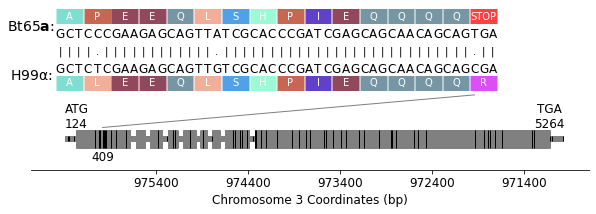

In [14]:
## Set figure
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.set_facecolor('w')

## Plot gene body
plt.hlines(0,znf3.Zeropos.min(),znf3.Zeropos.max(),color='grey',linewidth=6);

## Plot exons
for i,j in cds.iterrows():
    plt.vlines(j.Zeropos,-1,1,color='grey',alpha=1,linewidth=1)
    
## Plot variants  
## Variants not in exons
gvs = znf3[(znf3.Isvar==1) & (znf3.Type!=0)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,0.35,-0.25,color='k',linewidth=1)

## variants in exons
gvs = znf3[(znf3.Isvar==1) & (znf3.Type==0)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,1,-1,color='k',linewidth=1)
        
## Plot sequences     
## Set plotting variables for annotation of amino acids
x = -50
ys = 0.7
y1 = 8
y2 = y1+2.5
tw = 100
xpad = 45#30

## Initialize lists
plotpos = []
difpos = []

## Iterate over codons and sequence to plot
for i,(ri,p) in enumerate(to_plot.iterrows()):
    
    ## Set the x postion and append
    xp = x+(i*tw)
    plotpos.append(xp)
    
    ## Annotate the reference allele
    plt.text(xp,y=y1+ys,s=Seq(p.Ref),fontsize=12,color='k',va='top',ha='center')
    
    ## Annotate the alternatve allele
    plt.text(xp,y=y2+ys,s=Seq(p.Alt),fontsize=12,color='k',va='bottom',ha='center')
    
    ## draw line connecting alleles if equal, else use a dot for variant
    plt.text(xp,y=(y1+((y2-y1)/2))+ys+0.02, s='|' if p.Alt==p.Ref else '.',fontsize=10,color='k',va='center',ha='center')
    
    ## if allele don't match append dif position
    if p.Alt!=p.Ref:
        difpos.append(xp)
    
## Plot the reference amino acid sequence
for i,a in enumerate(to_plot.Refaa.tolist()[::3]):

    ## draw the rectagle representing the amino acid
    plt.hlines(y1-1.6,plotpos[::3][i]-xpad,plotpos[2::3][i]+xpad,linewidth=15,alpha=0.75,color=aadf[(aadf.AA==a)].Color)
    
    ## Annotate the amino acid
    plt.text(plotpos[1::3][i],y=y1-1.6,s=a,color='w',va='center',ha='center')

## Plot the alternative amino acid sequence
for i,a in enumerate(to_plot.Altaa.tolist()[::3]):

    ## make the rectangle representing the amino acid
    plt.hlines(y2+3.4,plotpos[::3][i]-xpad,plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,color=aadf[(aadf.AA==a)].Color)
    
    ## annotate the amino acid
    plt.text(plotpos[1::3][i],y=y2+3.4,s=a if a != '*' else 'STOP',color='w',va='center',ha='center')
    
## Gather xticks
x_xp,x_xl = plt.xticks()

## Gather gene position values
pos = znf3[(znf3.Zeropos.isin(x_xp[(x_xp>=500) & (x_xp<=znf3.Zeropos.max())]))].Pos.values

## Set relative position values
zeropos = znf3[(znf3.Zeropos.isin(x_xp[(x_xp>=500) & (x_xp<=znf3.Zeropos.max())]))].Zeropos.values

## gather a new x positon modification
newxmod = int(str(pos[0])[-2:])

## addjust xticks and set x-axis lables
plt.xticks(zeropos-newxmod , pos-newxmod ,fontsize=12)
plt.xlabel('Chromosome 3 Coordinates (bp)',fontsize=12)

## Annotate start and stop codons
## The start
plt.text(cds.Zeropos.min()+1,2.5,'ATG\n%s'%cds.Zeropos.min(),va='center',ha='center',fontsize=12)

## The stop
plt.text(cds.Zeropos.max()-1,2.5,'TGA\n%s'%str(cds.Zeropos.max()-2),va='center',ha='center',fontsize=12)

## Set y-xis limits
plt.ylim(-3.5,15);

## Turn off top, left and right spines
[ax.spines[a].set_visible(False) for a in ['top','left','right']]

## Remove yticks
plt.yticks([])

## Annotate H99 and Bt65 strain lables
plt.text(x-3.2*tw,y1,'%s:'%hypf.h99_label, fontsize=14,va='top',ha='center')
plt.text(x-3.2*tw,y2+1.5, hypf.bt_label+':', fontsize=14,va='bottom',ha='center')

## Annotate nonsense mutation
plt.text(cds[(cds.Altaa=='*')].Zeropos.min(),-2,'%s'%cds[(cds.Altaa=='*')].Zeropos.min(),va='center',ha='center',fontsize=12)

## plot a line between nonsnese mutation and amino acid in H99
plt.plot([cds[(cds.Altaa=='*')].Zeropos.min(),np.max(difpos)],[1.3,y1-3],color='k',alpha=0.5,linewidth=1)

## add a title (or dont)
#plt.title('ZNF3',fontstyle='italic',color='grey',fontsize=14)

## Save figure
plt.savefig('../FIGURES/ZNF3_Bt65vsH99.pdf',dpi=400,bbox_inches='tight');

In [15]:
## Check our work
assert np.max([np.unique([len(a) for a in znf3.Ref]),np.unique([len(a) for a in znf3.Alt])])==1